__In 2011, bit.ly, a URL shortening service, initiated a collaboration with the United States government website, usa.gov. This partnership aimed to offer a stream of anonymized data derived from users who shorten links concluding with .gov or .mil domains. Presently, alongside real-time access, users can obtain hourly snapshots through downloadable text files.__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/Owner/anaconda3/envs/tflowenv/USAGOV_Bityly_Data.txt'

In [3]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

Python has numerous built-in 3rd party modules for coverting a JSON string into a Python dictionary object. Here I will use the _json_ module and its _loads_ function invoked on each line in the sample file I downloaded:

In [4]:
import json
path = 'C:/Users/Owner/anaconda3/envs/tflowenv/USAGOV_Bityly_Data.txt'
records = [json.loads(line) for line in open(path)]

If you have never programmed in Python before, the last expression here is called a list comprehension, which is a concise way of applying an operation (like json.loads) to a collection of strings or other objects. Conveniently, iterating over an open file handle gives you a sequence of its lines. The resulting object _records_ is now a list of Python dicts:

In [5]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

Note that Python indices start at 0 and not 1 like some other languages (like R). It's now easy to access individual values within records by passing a string for the key you wish to access:

In [6]:
records[0]['tz']

'America/New_York'

__Counting Time zones in pure python__

Suppose we were interested in the most often-occuring time zones in the data set (the tz field). There are many ways we could do this. first, lets extract a list of time zones again using a list comprehension:

In [7]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [8]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

Just looking at the first zones we see that some of them are unknown (empty). You can filter these out but I'll leave them in for now. Now, to produce counts by time zone i'll show two approaches: the harder way (using just the Python standard library) and the easier way (using pandas). One way to do the counting is to use a dict to store counts while we iterate through the time zones:

In [9]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [10]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

I put this logic in a function just to make it more reusable. To use it on the time zones, just pass the _time_zones_ list:

In [11]:
counts = get_counts(time_zones)

In [12]:
counts['America/New_York']

1251

In [13]:
len(time_zones)

3440

If we wanted the top 10 time zones and their counts, we have to do a little bit of dictionary acrobatics:

In [14]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

We have then:

In [15]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

If you search the Python standard library, you may find the __collections.Counter__ class, which makes this task a lot easier:

In [16]:
from collections import Counter

In [17]:
counts = Counter(time_zones)

In [18]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

__Counting time zones with pandas__

The main pandas data structure is the _DataFrame_, which you can think of as representing a table or spreadsheet of data. Creating a DataFrame from the original set of records is simple:

In [19]:
from pandas import DataFrame, Series

In [20]:
import pandas as pd

In [21]:
frame = DataFrame(records)

In [22]:
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [23]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

The output shown for the __frame__ is the _summary view_, shown for large DataFrame objects. The Series object returned by __frame['tz']__ has a method __value_counts__ that gives us what we're looking for:

In [24]:
tz_counts = frame['tz'].value_counts()

In [25]:
tz_counts[:10]

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: count, dtype: int64

Then, we might want to make a plot of this data using plotting library, matplotlib. You can do a bit of munging to fill in a substitute value for unkown and missing time zone data in the records. The __fillna__ function can replace missing (NA) values and unknown (empty strings) values can be replaced by boolean array indexing:

In [26]:
clean_tz = frame['tz'].fillna('Missing')

In [27]:
clean_tz[clean_tz == ''] = 'Unknown'

In [28]:
tz_counts = clean_tz.value_counts()

In [29]:
tz_counts[:10]

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: count, dtype: int64

Making a horizontal bar plot can be accomplished using the plot method on the counts objects:

<Axes: ylabel='tz'>

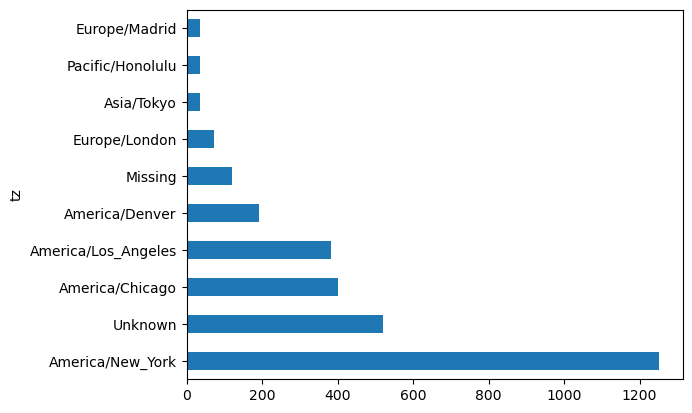

In [30]:
tz_counts[:10].plot(kind='barh', rot=0)

_Figure 2-1. Top time zones in the 1.USA.GOV sample data_

In [31]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [32]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [33]:
frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

Parsing all of the interesting information in these "agent" strings may seem like a daunting task. Luckily once you have mastered Python's built-in string functions and regular expresssion capabilities, it is really not so bad. For example, we could split off the first token in the string (corresponding roughly to the browser capability) and make another summary of the user behaviour:

In [34]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [35]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [36]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

Now, suppose you wanted to decompose the top time zones into Windows and non-Windows users. As a simplification, let's say that a user is on Windows if the string __'Windows'__ is in the agent string. Since some of the agents are missing, I'll exclude these from the data:

In [37]:
cframe = frame[frame.a.notnull()]

We want to then compute a value whether each row is Windows or not:

In [38]:
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')

In [39]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

Then, you can group the data by its time zone column and this new list of operating systems:

In [40]:
by_tz_os = cframe.groupby(['tz', operating_system])

The group counts, analogous to the __value_counts__ function above, can be computed using __size__. This result is then reshaped into a table with __unstack__:

In [41]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [42]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


Finally, let's select the top overall time zones. To do so, I construct an indirect index array from the row counts in __agg_counts:__

In [43]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()

In [44]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

I then use __take__ to select the rows in that order, then slice off the last 10 rows:

In [45]:
count_subset = agg_counts.take(indexer)[-10:]

In [46]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


Then, as shown in the preceding code block, this can be plotted in a bar plot; I'll make it a stacked bar plot by passing __stacked=True__

<Axes: ylabel='tz'>

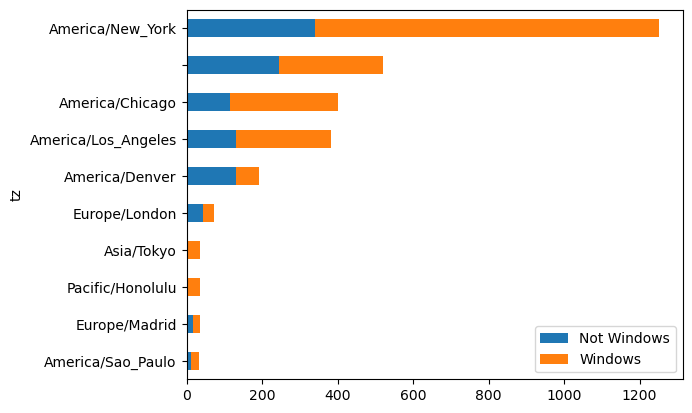

In [47]:
count_subset.plot(kind='barh', stacked=True)

_Figure 2-2. Top time zones by Windows and non-Windows users_

The plot doesn't make it easy to see the relative percentage of Windows users in the smaller groups, but the rows can easily be normalized to sum to 1 then plotted again below (Figure 2-3)

In [48]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

<Axes: ylabel='tz'>

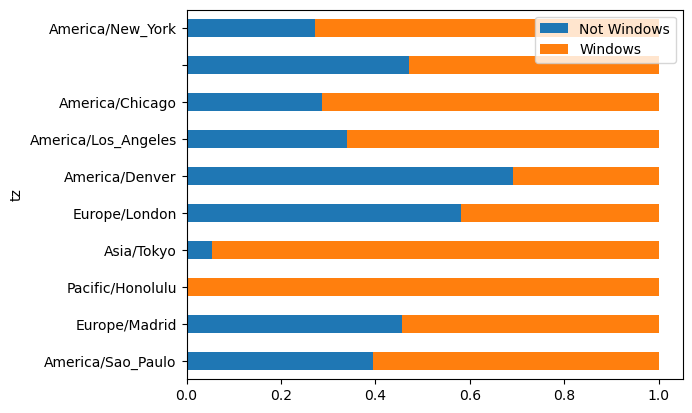

In [49]:
normed_subset.plot(kind='barh', stacked=True)

_Figure 2-3. Percentage Windows and non-Windows users in top-occuring time zones_ 

__GroupLens Research (http://www.grouplens.org/node/73) provides a number of collections of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metadata (genres and year), and
demographic data about the users (age, zip code, gender, and occupation).The MovieLens 1M data set contains 1 million ratings collected from 6000 users on
4000 movies. It’s spread across 3 tables: ratings, user information, and movie informati. After extracting the data from the zip file, each table can be loaded into a pandas DataFrame object using pandas.read_table:___        

In [50]:
import pandas as pd
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('C:/Users/Owner/anaconda3/envs/tflowenv/users.dat', sep='::', header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('C:/Users/Owner/anaconda3/envs/tflowenv/ratings.dat', sep='::', header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('C:/Users/Owner/anaconda3/envs/tflowenv/movies.dat', sep='::', header=None, names=mnames)

C:\Users\Owner\AppData\Local\Temp\ipykernel_16280\306901149.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table('C:/Users/Owner/anaconda3/envs/tflowenv/users.dat', sep='::', header=None, names=unames)
C:\Users\Owner\AppData\Local\Temp\ipykernel_16280\306901149.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table('C:/Users/Owner/anaconda3/envs/tflowenv/ratings.dat', sep='::', header=None, names=rnames)
C:\Users\Owner\AppData\Local\Temp\ipykernel_16280\306901149.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support reg

You can verify that everything succeeded by looking at the first few rows of each DataFrame with Python's slice syntax:

In [51]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [52]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [53]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [54]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


Note that ages and occupations are coded as integers indicating groups described in the data set's __README__ file. Analyzing the data spread across three tables is not a simple task; for example, suppose you wanted to compute mean ratings for a particular movie by sex and age. As you will see this is much easier to do with all of the data merged into a single table. Using pandas's __merge__ function, we first merge __ratings__ with __users__ then merging that result with the __movies__ data. pandas infers which columns to use as the merge (or join) keys based on overlapping names:

In [55]:
data = pd.merge(pd.merge(ratings, users), movies)

In [56]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [57]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In this form, aggregating the ratings grouped by one or more user or movie attributes is straightforward once you build some familiarity with pandas. To get mean movie ratings for each film grouped by gender, we can use the __pivot_table__ method:

In [58]:
mean_ratings = data.pivot_table(values='rating', index='title', columns='gender', aggfunc='mean')

In [59]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


This produced another DataFrame containing mean ratings with movie totals as row labels and gender as column labels. First, I'm going to filter down to movies that received at least 250 ratings (a completely arbitrary number): to do this, I group the data by title and use __size()__ to get a Series of group sizes for each title:

In [60]:
ratings_by_title = data.groupby('title').size()

In [61]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [62]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [63]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

The index of titles receiving at least 250 ratings can then be used to select rows from __mean_ratings__ above:

In [64]:
mean_ratings = mean_ratings.loc[active_titles]

In [65]:
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


To see the top films among female viewers, we can sort by the F column in descending order:

In [66]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [67]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


__Measuring rating disagreement__

Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to __mean_ratings__ containing the difference in means, then sort by that:

In [68]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by women:

In [69]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [70]:
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Reversing the order of the rows and again slicing off the top 15 rows, we get the movies preferred by men that women didn't rate as highly:

In [ ]:
# Reverse order of rows, take first 15 rows

In [71]:
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


Suppose instead you wanted the movies that elicited the most disagreement among viewers, independent of gender. Disagreement can be measured by the variance or standard deviation of the ratings:

In [ ]:
# Standard deviation of rating grouped by title

In [72]:
rating_std_by_title = data.groupby('title')['rating'].std()

In [73]:
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [ ]:
# Order Series by value in descending order

In [74]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

__US Baby Names 1880-2010__

The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through the present. Hadley Wickham, an author of several popular R packages, has often made use of this data set in illustrating data manipulation in R.

There are many things you might want to do with the data set:
- Visualize the proportion of babies given a particular name (your own, or another name) over time.
- Determine the relative rank of a name.
- Determine the most popular names in each year or the names with largest increases or decreases.
- Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters
- Analyze external sources of trends: biblical names, celebrities, demographic changes

As this is a nicely comma-separated form, it can be loaded into a DataFrame with __pandas.read_csv:__

In [75]:
import pandas as pd

In [76]:
names1880 = pd.read_csv('C:/Users/Owner/anaconda3/envs/tflowenv/babynames/yob1880.txt', names=['name','sex','births'])

In [77]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


These files only contain names with at least 5 occurrences in each year, so for simplicity's sake we can use the sum of the births column by sex as the total number of births in that year:

In [78]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

Since the data set is split into files by year, one of the first things to do is to assemble all of the data into a single DataFrame and further to add a __year__ field. This is easy to do using __pandas.concat:__

In [79]:
# 2010 is the last available year right now
years = range(1880, 2011)
pieces = []
columns = ['name','sex','births']
for year in years:
    path = 'C:/Users/Owner/anaconda3/envs/tflowenv/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

There are a couple of things to note here. First, remember that __concat__ glues the DataFrame objects together row-wise by default. Secondly, you have to pass __ignore_index=True__ because we're not interested in preserving the original row numbers returned from __read_csv__. So we now have a very large DataFrame containing all of the names data:

Now the __names__ DataFrame looks like:

In [80]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


With this data in hand, we can already start aggregating the data at the year and sex level using __groupby or pivot_table__, see Figure 2-4:

In [81]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

C:\Users\Owner\AppData\Local\Temp\ipykernel_16280\3336902413.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)


In [82]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

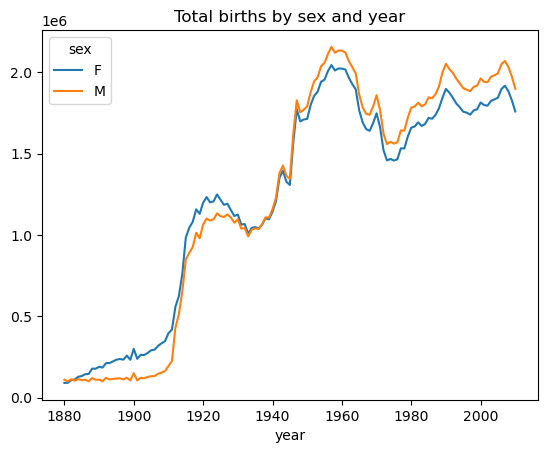

In [83]:
total_births.plot(title='Total births by sex and year')

Figure 2-4. Total births by sex and year

Next, let's insert a column __prop__ with the fraction of babies given each name relative to the total number of births. A __prop__ value of __0.02__ would indicate that 2 out of every 100 babies was given a particular name. Thus, we group the data by year and sex, then add the new column to each group:

In [84]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)

    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

C:\Users\Owner\AppData\Local\Temp\ipykernel_16280\226908153.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(['year', 'sex']).apply(add_prop)


The resulting complete data set now has the following columns:

In [85]:
names

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1690779    Zymaire   M       5  2010  0.000003
         1690780     Zyonne   M       5  2010  0.000003
         1690781  Zyquarius   M       5  2010  0.000003
         1690782      Zyran   M       5  2010  0.000003
         1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]

When performing a group operation like this, it's often valuable to do a sanity check, like verifying that the prop column sums to 1 within all the groups. Since this is floating point data, use __np.allclose__ to check that the group sums are sufficiently close to (but perhaps not exactly equal to) 1:

Now that this is done, I'm going to extract a subset of the data to facilitate further analysis: the top 1000 names for each sex/year combination. This is yet another group operation:

In [86]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

# Assuming 'names' DataFrame is already defined
names.reset_index(inplace=True, drop=True)  # Reset index without re-adding columns as regular columns
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

C:\Users\Owner\AppData\Local\Temp\ipykernel_16280\186060432.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


The resulting data set is now quite a bit smaller:

In [87]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

We'll use this Top 1,000 data set in the following investigations into the data.

__Analyzing Naming Trends__

With the full data set and Top 1,000 data set in hand, we can start analyzing various naming trends of interest. Splitting the Top 1,000 names into the boy and girl portions is easy to do first:

In [88]:
boys = top1000[top1000.sex == 'M']

In [89]:
girls = top1000[top1000.sex == 'F']

Simple time series, like the number of Johns or Marys for each year can be plotted but require a bit of munging to be a bit more useful. Let's form a pivot table of the total number of births by year and name:

In [90]:
total_births = top1000.pivot_table('births', index=top1000.year, columns='name', aggfunc='sum')

Now, this can be plotted for a handful of names using DataFrames's __plot__ method:

In [91]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

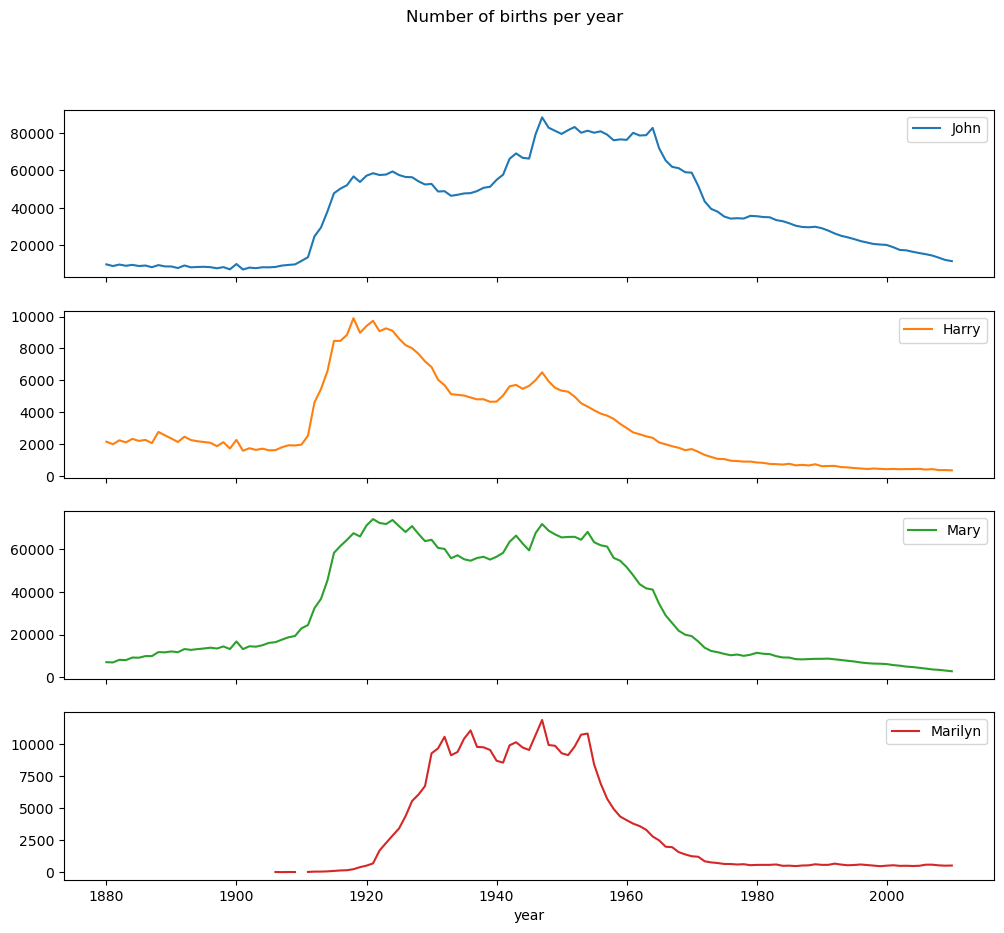

In [93]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

Figure 2-5. A few boy and girl names over time

__Measuring the increase in naming diversity__

One explanation for the decrease in plots above is that fewer parents are choosing common names for their children. This hypothesis can be explored and confirmed in the data. One measure is the proportion of births represented by the top 1000 most popular names, which i aggregrate and plot by year and sex:

In [94]:
table = top1000.pivot_table('prop', index=top1000.year, columns=top1000.sex, aggfunc=sum)

C:\Users\Owner\AppData\Local\Temp\ipykernel_16280\122218219.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = top1000.pivot_table('prop', index=top1000.year, columns=top1000.sex, aggfunc=sum)


<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

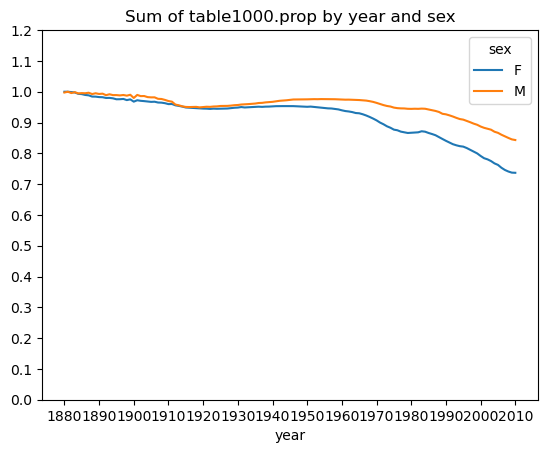

In [95]:
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

Figure 2-6. Proportion of births represented in top 1000 names by sex

So you can see that, indeed, there appears to be increasing name diversity (decreasing total proportion in the top 1,000). Another interesting metric is the number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births. This number is a bit more tricky to compute. Let's consider just the boy names from 2010:

In [96]:
df = boys[boys.year == 2010]

In [97]:
df

name sex  births  year      prop
year sex                                             
2010 M   1676644    Jacob   M   21875  2010  0.011523
         1676645    Ethan   M   17866  2010  0.009411
         1676646  Michael   M   17133  2010  0.009025
         1676647   Jayden   M   17030  2010  0.008971
         1676648  William   M   16870  2010  0.008887
...                   ...  ..     ...   ...       ...
         1677639   Camilo   M     194  2010  0.000102
         1677640   Destin   M     194  2010  0.000102
         1677641   Jaquan   M     194  2010  0.000102
         1677642   Jaydan   M     194  2010  0.000102
         1677645   Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]

After sorting __prop__ in descending order, we want to know how many of the most popular names it takes to reach 50%. You could write a __for__ loop to do this, but a vectorised NumPy way is a bit more clever. Taking the cumulative sum, __cumsum__, of __prop__ then calling the method __searchsorted__ returns the position in the cumulative sum at which __0.5__ would need to be inserted to keep it in sorted order:

In [101]:
prop_cumsum = df.sort_values(by='prop', ascending=False)['prop'].cumsum()

In [102]:
prop_cumsum[:10]

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
Name: prop, dtype: float64

In [103]:
prop_cumsum.searchsorted(0.5)

116

Since arrays are zero-indexed, adding 1 to this result gives you a result of 117. By contrast, in 1900 this number was much smaller:

In [104]:
df = boys[boys.year == 1900]

In [105]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [106]:
in1900.searchsorted(0.5) + 1

25

It should now be fairly straightforward to apply this operation to each year/sex combination; __groupby__ those fields and __apply__ a function returning the count for each group:

In [110]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

# Reset index without adding existing columns to the index
diversity = top1000.reset_index(drop=True).groupby(['year', 'sex']).apply(get_quantile_count)

# Unstack 'sex'
diversity = diversity.unstack('sex')


C:\Users\Owner\AppData\Local\Temp\ipykernel_16280\3263816752.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.reset_index(drop=True).groupby(['year', 'sex']).apply(get_quantile_count)


This resulting DataFrame __diversity__ now has two time series, one for each sex, indexed by year. This can be inspected in IPython and plotted as before (see Figure 2-7):

In [111]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

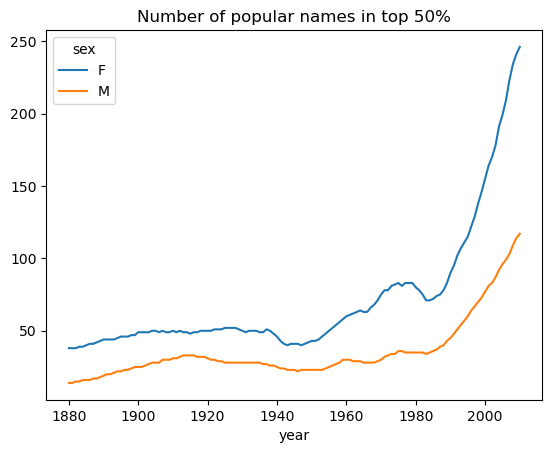

In [112]:
diversity.plot(title="Number of popular names in top 50%")

Figure 2-7. Plot of diversity metric by year

As you can see, girl names have always been more diverse than boy names, and they have only become more so over time. Further analysis of what exactly is driving the diversity, like the increase of alternate spellings, is left to the reader.